<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# PCA Lab: Speed Dating

_Authors: Kiefer Katovich (SF)_

---

Let's practice principal component analysis (PCA) using a data set from Kaggle. PCA is often used to simplify data, reduce noise, and find unmeasured latent variables, so it's important to take the time to understand what's going on.

**In this lab, we will:**

- Explore how PCA relates to correlation.
- Use PCA to perform dimensionality reduction.
- Predict whether or not a speed dater likes reading based on the dater's other likes.

---

### Data Set

The data set we're using for this lab is a subset of this [much more detailed speed dating data set](https://www.kaggle.com/annavictoria/speed-dating-experiment). In particular, this contains no information on the actual speed dating itself (i.e., successes with or opinions of other individuals). 

It also contains no follow-up information where individuals are asked the same questions about themselves again. It only contains information about what an individual enjoys doing, their self-ratings on how desirable they are, and how they think others rate them based on desirability.

The columns present in the data are outlined below:

FieldName|Description
---------|-----------
    subject_id                   |   Unique individual identifier.
    wave                         |   Meetup ID.
    like_sports                  |   Enjoyment of participating in sports.
    like_tvsports                |   Enjoyment of watching sports on TV.
    like_exercise                |   Enjoyment of exercise.
    like_food                    |   Enjoyment of food.
    like_museums                 |   Enjoyment of museums.
    like_art                     |   Enjoyment of art.
    like_hiking                  |   Enjoyment of hiking.
    like_gaming                  |   Enjoyment of playing games.
    like_clubbing                |   Enjoyment of going clubbing/partying.
    like_reading                 |   Enjoyment of reading.
    like_tv                      |   Enjoyment of TV in general.
    like_theater                 |   Enjoyment of the theater (plays, musicals, etc.).
    like_movies                  |   Enjoyment of movies.
    like_concerts                |   Enjoyment of concerts.
    like_music                   |   Enjoyment of music.
    like_shopping                |   Enjoyment of shopping.
    like_yoga                    |   Enjoyment of yoga.
    subjective_attractiveness    |   How attractive they rate themselves.
    subjective_sincerity         |   How sincere they rate themselves.
    subjective_intelligence      |   How intelligent they rate themselves.
    subjective_fun               |   How fun they rate themselves.
    subjective_ambition          |   How ambitious they rate themselves.
    objective_attractiveness     |   Perceived rating others would give them on how attractive they are.
    objective_sincerity          |   Perceived rating others would give them on how sincere they are.
    objective_intelligence       |   Perceived rating others would give them on how intelligent they are.
    objective_fun                |   Perceived rating others would give them on how fun they are.
    objective_ambition           |   Perceived rating others would give them on how ambitious they are.
    
There are 551 subjects total.

---

### 1) Load packages.

In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---

### 2) Load and clean the speed dating data.

- First, remove columns with more than 200 missing values.
- Then, remove rows with missing values.
- Verify that no rows contain NaNs.

In [2]:
# Load data
sd = pd.read_csv('./datasets/speed_dating.csv')

In [3]:
# Check column names
sd.columns

Index(['subject_id', 'wave', 'like_sports', 'like_tvsports', 'like_exercise',
       'like_food', 'like_museums', 'like_art', 'like_hiking', 'like_gaming',
       'like_clubbing', 'like_reading', 'like_tv', 'like_theater',
       'like_movies', 'like_concerts', 'like_music', 'like_shopping',
       'like_yoga', 'subjective_attractiveness', 'subjective_sincerity',
       'subjective_intelligence', 'subjective_fun', 'subjective_ambition',
       'objective_attractiveness', 'objective_sincerity',
       'objective_intelligence', 'objective_fun', 'objective_ambition'],
      dtype='object')

In [4]:
# Check info
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_id                 551 non-null    int64  
 1   wave                       551 non-null    int64  
 2   like_sports                544 non-null    float64
 3   like_tvsports              544 non-null    float64
 4   like_exercise              544 non-null    float64
 5   like_food                  544 non-null    float64
 6   like_museums               544 non-null    float64
 7   like_art                   544 non-null    float64
 8   like_hiking                544 non-null    float64
 9   like_gaming                544 non-null    float64
 10  like_clubbing              544 non-null    float64
 11  like_reading               544 non-null    float64
 12  like_tv                    544 non-null    float64
 13  like_theater               544 non-null    float64

In [5]:
# Check for NaNs
sd.isnull().sum()

subject_id                     0
wave                           0
like_sports                    7
like_tvsports                  7
like_exercise                  7
like_food                      7
like_museums                   7
like_art                       7
like_hiking                    7
like_gaming                    7
like_clubbing                  7
like_reading                   7
like_tv                        7
like_theater                   7
like_movies                    7
like_concerts                  7
like_music                     7
like_shopping                  7
like_yoga                      7
subjective_attractiveness      9
subjective_sincerity           9
subjective_intelligence        9
subjective_fun                 9
subjective_ambition            9
objective_attractiveness     237
objective_sincerity          237
objective_intelligence       237
objective_fun                237
objective_ambition           237
dtype: int64

In [6]:
# Drop columns with more than 200 nulls
sd.drop(['objective_attractiveness','objective_sincerity',
         'objective_intelligence','objective_fun','objective_ambition'],
        axis=1, inplace=True)

In [7]:
# Check again for NaNs
sd.isnull().sum()

subject_id                   0
wave                         0
like_sports                  7
like_tvsports                7
like_exercise                7
like_food                    7
like_museums                 7
like_art                     7
like_hiking                  7
like_gaming                  7
like_clubbing                7
like_reading                 7
like_tv                      7
like_theater                 7
like_movies                  7
like_concerts                7
like_music                   7
like_shopping                7
like_yoga                    7
subjective_attractiveness    9
subjective_sincerity         9
subjective_intelligence      9
subjective_fun               9
subjective_ambition          9
dtype: int64

In [8]:
# Drop rows with NaN values
sd.dropna(inplace=True)

In [9]:
# Verify no rows contain NaN
sd.isnull().sum()

subject_id                   0
wave                         0
like_sports                  0
like_tvsports                0
like_exercise                0
like_food                    0
like_museums                 0
like_art                     0
like_hiking                  0
like_gaming                  0
like_clubbing                0
like_reading                 0
like_tv                      0
like_theater                 0
like_movies                  0
like_concerts                0
like_music                   0
like_shopping                0
like_yoga                    0
subjective_attractiveness    0
subjective_sincerity         0
subjective_intelligence      0
subjective_fun               0
subjective_ambition          0
dtype: int64

In [10]:
# Check the shape of the dataframe
sd.shape

(542, 24)

In [11]:
# Print the first 5 rows of data
sd.head()

subject_id  wave  like_sports  like_tvsports  like_exercise  like_food  \
0           1     1          9.0            2.0            8.0        9.0   
1           2     1          3.0            2.0            7.0       10.0   
2           3     1          3.0            8.0            7.0        8.0   
3           4     1          1.0            1.0            6.0        7.0   
4           5     1          7.0            4.0            7.0        7.0   

   like_museums  like_art  like_hiking  like_gaming  ...  like_movies  \
0           1.0       1.0          5.0          1.0  ...         10.0   
1           8.0       6.0          3.0          5.0  ...          8.0   
2           5.0       5.0          8.0          4.0  ...          7.0   
3           6.0       7.0          7.0          5.0  ...          7.0   
4           6.0       8.0          6.0          6.0  ...          6.0   

   like_concerts  like_music  like_shopping  like_yoga  \
0           10.0         9.0            8.0        1.0   
1            7.0         8.0            3.0        1.0   
2            7.0         5.0            8.0        7.0   
3            8.0         7.0            1.0        8.0   
4            3.0         7.0            8.0        3.0   

   subjective_attractiveness  subjective_sincerity  subjective_intelligence  \
0                        6.0                   8.0                      8.0   
1                        7.0                   5.0                      8.0   
2                        8.0                   9.0                      9.0   
3                        7.0                   8.0                      7.0   
4                        6.0                   3.0                     10.0   

   subjective_fun  subjective_ambition  
0             8.0                  7.0  
1            10.0                  3.0  
2             8.0                  8.0  
3             9.0                  8.0  
4             6.0                  8.0  

[5 rows x 24 columns]

---

### 3) Example: Are the `subjective` columns correlated?

Here, we'll understand how the `subjective` columns are correlated.

- Find the z scores of each `subjective` column.
- Visualize correlation using PairGrid.
- Visualize correlation using a heat map.

#### 3.A) Find the z scores of each column. 

This allows the columns to more easily be directly compared.<br>
([Interpretation of Z-score ](https://www.geeksforgeeks.org/z-score-in-statistics/))<br>
Converting data to z-scores allows for easier comparison across feature columns because it standardizes the data by removing the original units of measurement and scaling it based on the mean and standard deviation of each column.

In [12]:
# Standardizing subjective 'traits'
subjective_cols = [col for col in sd.columns if col.startswith('subjective')]
print(subjective_cols)
subjective = sd[subjective_cols]
subjective = (subjective - subjective.mean()) / subjective.std()

['subjective_attractiveness', 'subjective_sincerity', 'subjective_intelligence', 'subjective_fun', 'subjective_ambition']


In [13]:
# Print the first 5 rows of subjective
subjective.head()

subjective_attractiveness  subjective_sincerity  subjective_intelligence  \
0                  -0.785746             -0.202528                -0.353867   
1                  -0.066364             -2.327117                -0.353867   
2                   0.653019              0.505668                 0.563817   
3                  -0.066364             -0.202528                -1.271551   
4                  -0.785746             -3.743510                 1.481501   

   subjective_fun  subjective_ambition  
0        0.193145            -0.323290  
1        1.485544            -2.562565  
2        0.193145             0.236529  
3        0.839344             0.236529  
4       -1.099255             0.236529

#### 3.B) Use a PairGrid to visualize correlation.

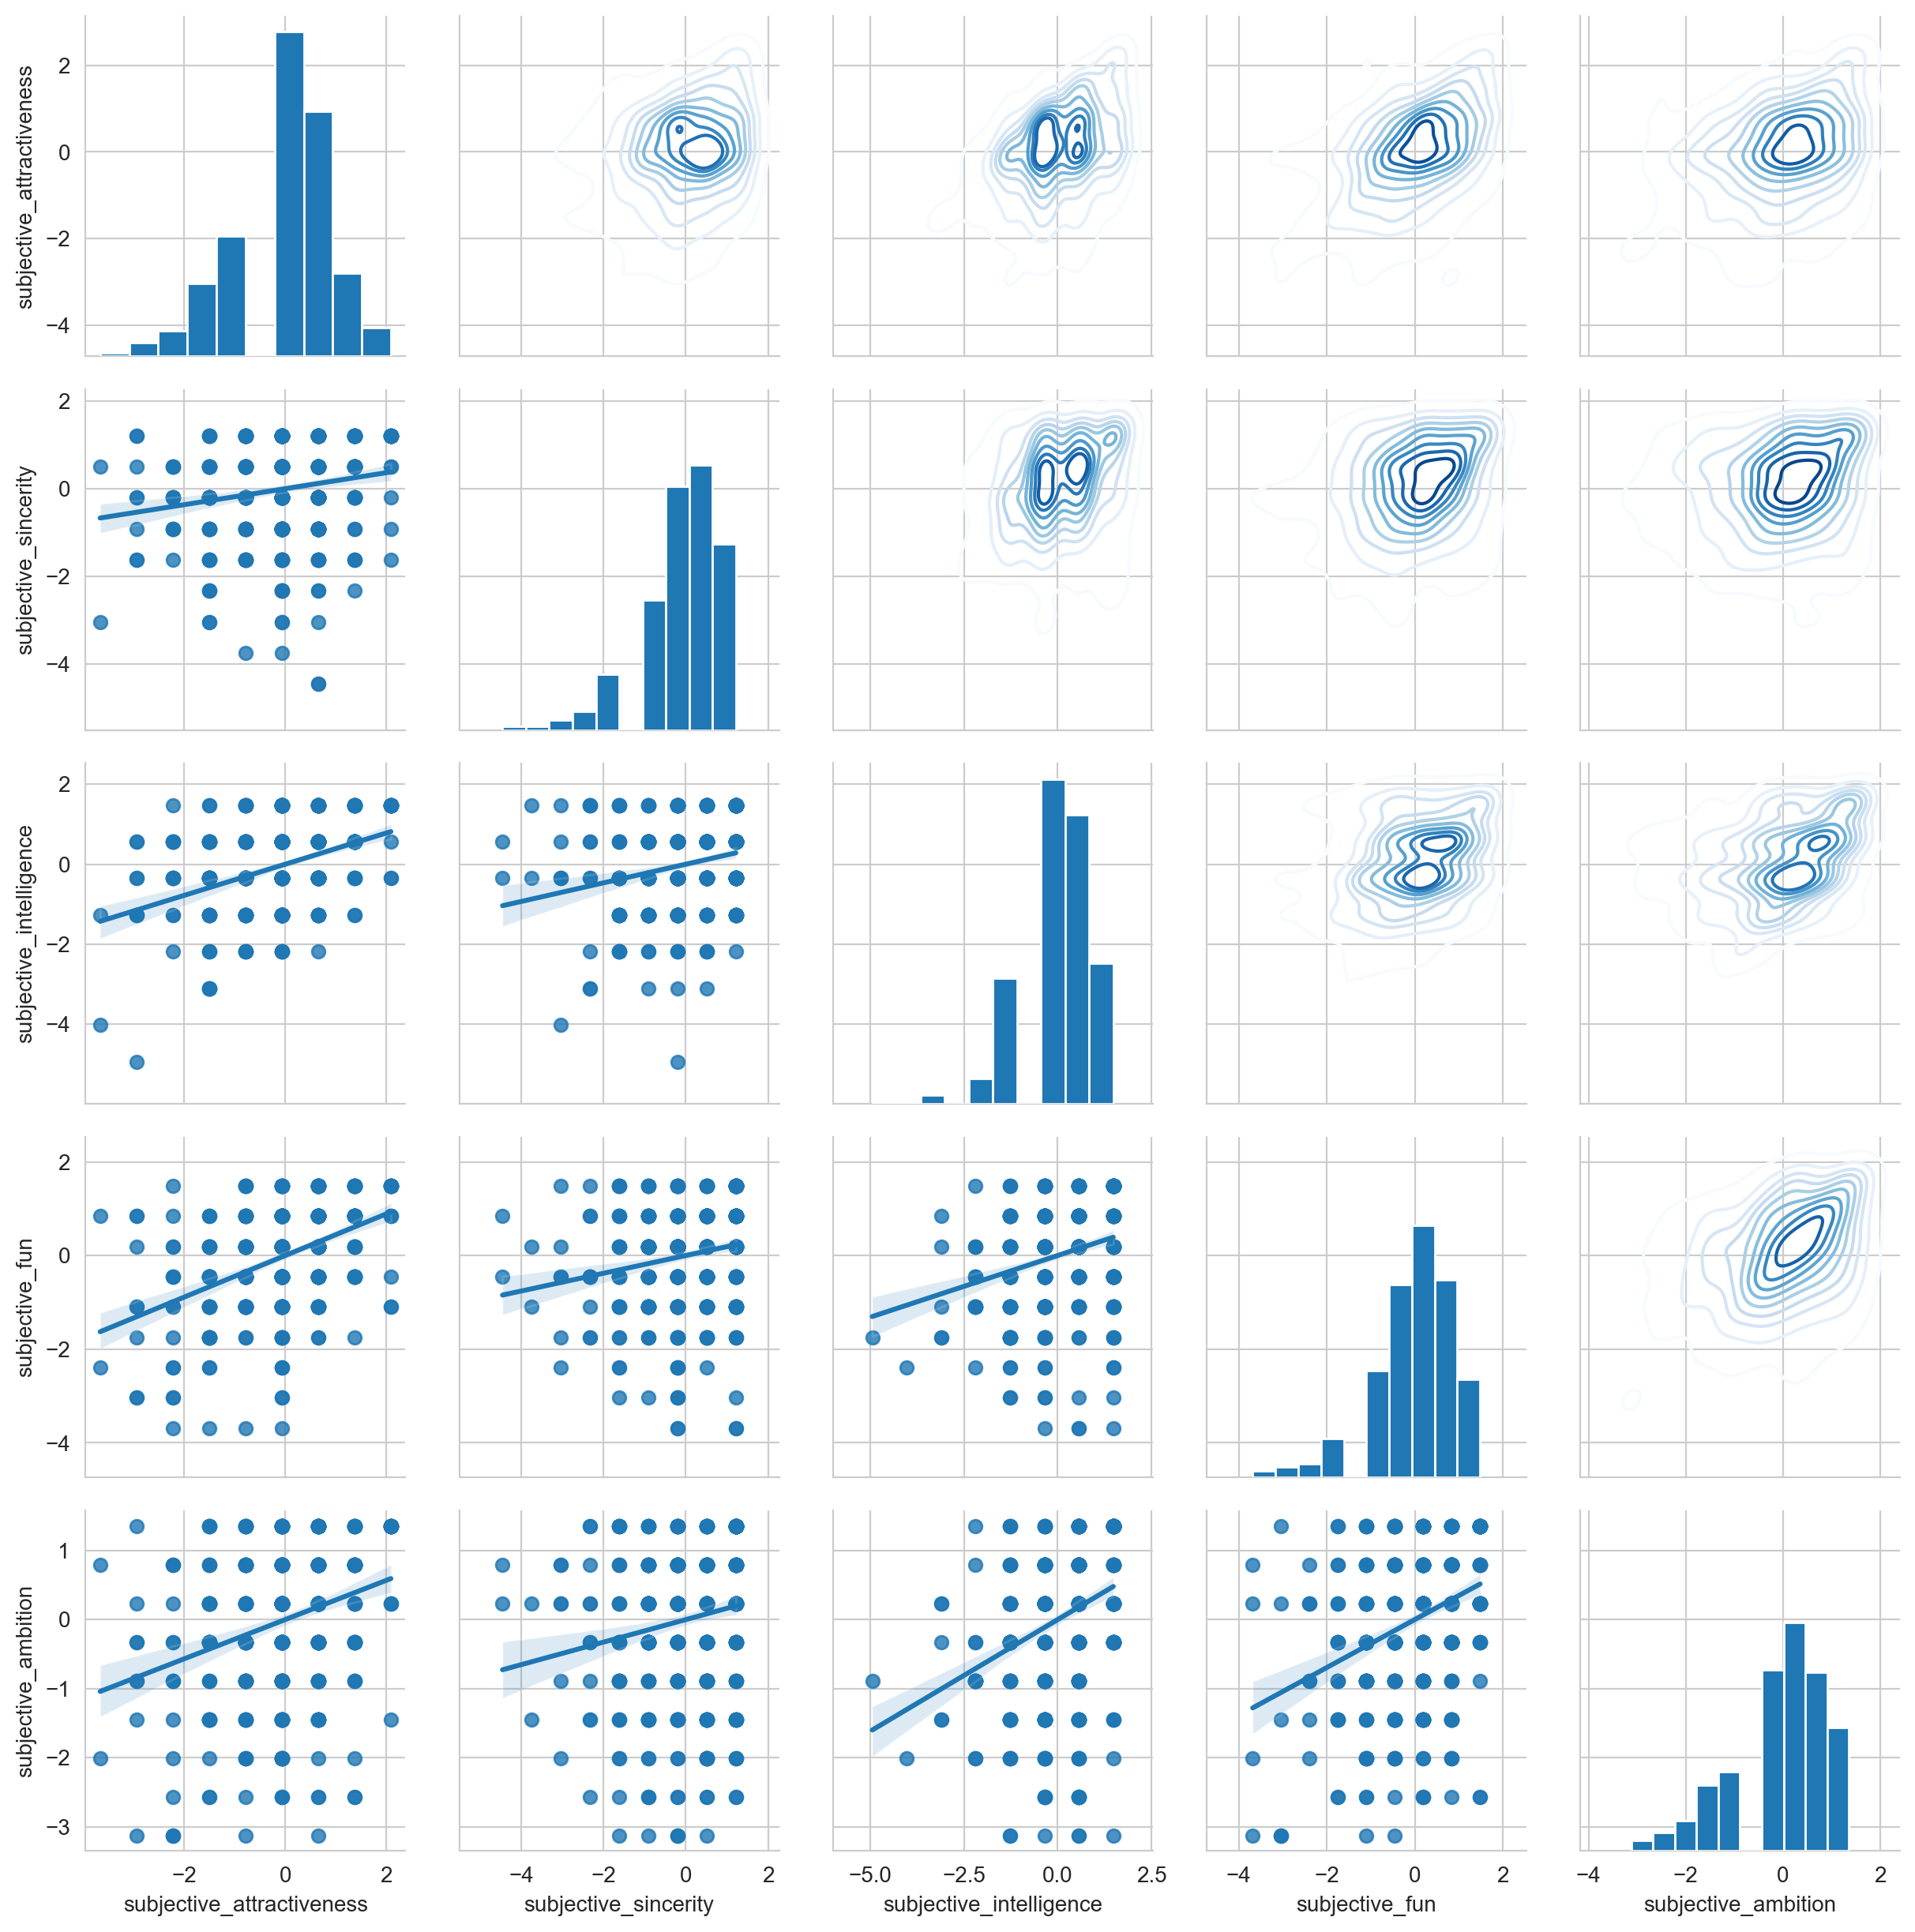

In [14]:
# Plotting pairgrid
g = sns.PairGrid(subjective)
g = g.map_lower(sns.regplot)    # Regression plots in lower triangle.
g = g.map_upper(sns.kdeplot, cmap="Blues")  # KDE plots in upper triangle.
g = g.map_diag(plt.hist)        # Histograms along diagonal.
plt.show()

#### 3.C) Use a heat map to visualize correlation.

In [15]:
# Correlation values for subjective
subjective.corr()

subjective_attractiveness  subjective_sincerity  \
subjective_attractiveness                   1.000000              0.182410   
subjective_sincerity                        0.182410              1.000000   
subjective_intelligence                     0.390144              0.233328   
subjective_fun                              0.444195              0.189761   
subjective_ambition                         0.283712              0.163047   

                           subjective_intelligence  subjective_fun  \
subjective_attractiveness                 0.390144        0.444195   
subjective_sincerity                      0.233328        0.189761   
subjective_intelligence                   1.000000        0.263585   
subjective_fun                            0.263585        1.000000   
subjective_ambition                       0.323155        0.346745   

                           subjective_ambition  
subjective_attractiveness             0.283712  
subjective_sincerity                  0.163047  
subjective_intelligence               0.323155  
subjective_fun                        0.346745  
subjective_ambition                   1.000000

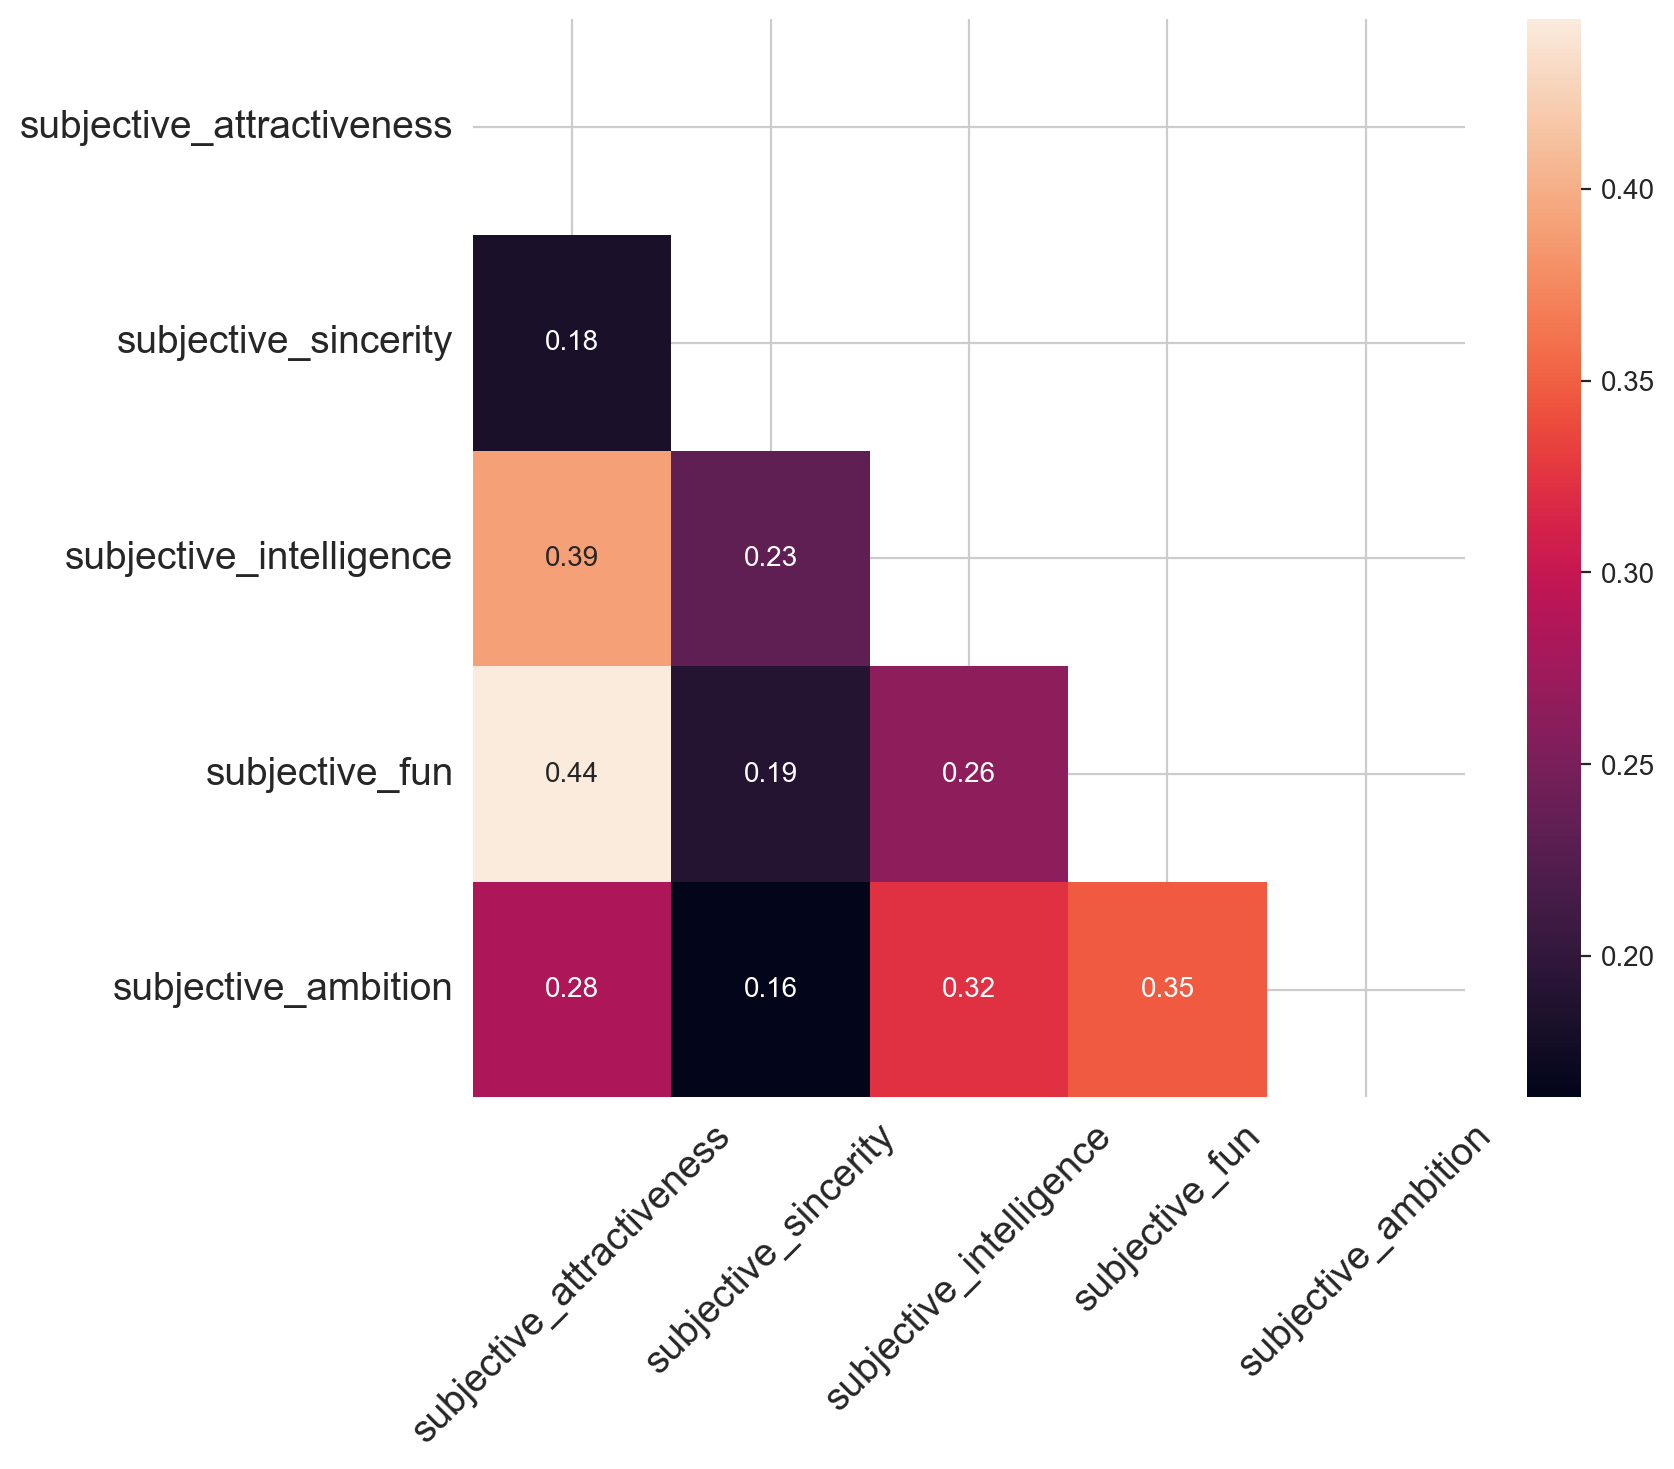

In [16]:
# Generate a mask for the upper triangle
mask = np.zeros_like(subjective.corr())
mask[np.triu_indices_from(mask)] = True       

fig, ax = plt.subplots(figsize=(8,7))

# Plot the heat map with Seaborn
ax = sns.heatmap(subjective.corr(), mask=mask, annot=True)

# Resize the labels
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.show()

---

**Important: Did you ensure the results make sense intuitively?** If not, look at the results again. You should **always** interpret your results and ensure they make sense based on what you expected. If they don’t, investigate why — often your analysis or data are wrong.

> For example, the results show that believing you are attractive and fun are correlated. Would you expect that believing you are intellectual and fun to have a higher or lower correlation? What do the results say?

---


### 4) Visualize some preference columns.

Next, we’ll explore how some preference ratings are correlated. You saw an example — now try it on the `preference_cols` below.

- Find the z scores of each column in `preference_cols`.
- Visualize correlation using PairGrid.
- Visualize correlation using a heat map.
- Do these results make sense intuitively? 

In [17]:
# Creating preference dataframe chosen by question
preference_cols = ['like_tvsports', 'like_sports', 'like_museums', 'like_theater', 'like_shopping']
preferences = sd[preference_cols]

#### 4.A) Find the z scores of each column in `preference_cols`.

In [18]:
# Standardizing preferences
preferences = (preferences - preferences.mean()) / preferences.std()
preferences

like_tvsports  like_sports  like_museums  like_theater  like_shopping
0        -0.911937     0.991623     -2.932342     -2.558505       0.912411
1        -0.911937    -1.290584      0.497160      0.984669      -0.999912
2         1.229305    -1.290584     -0.972626      0.098875       0.912411
3        -1.268811    -2.051320     -0.482697      0.984669      -1.764841
4        -0.198190     0.230888     -0.482697     -0.344021       0.912411
..             ...          ...           ...           ...            ...
546       1.229305     1.371991     -1.952484     -1.229815      -0.617447
547       0.158684     0.611255      0.007231      0.541772       0.912411
548      -0.555064    -0.529848      0.007231      0.098875       0.147482
549      -1.268811    -0.149480      0.007231     -0.786918       0.529946
550      -0.911937     0.611255      1.477018      0.098875       0.529946

[542 rows x 5 columns]

#### 4.B) Visualize correlation using PairGrid.

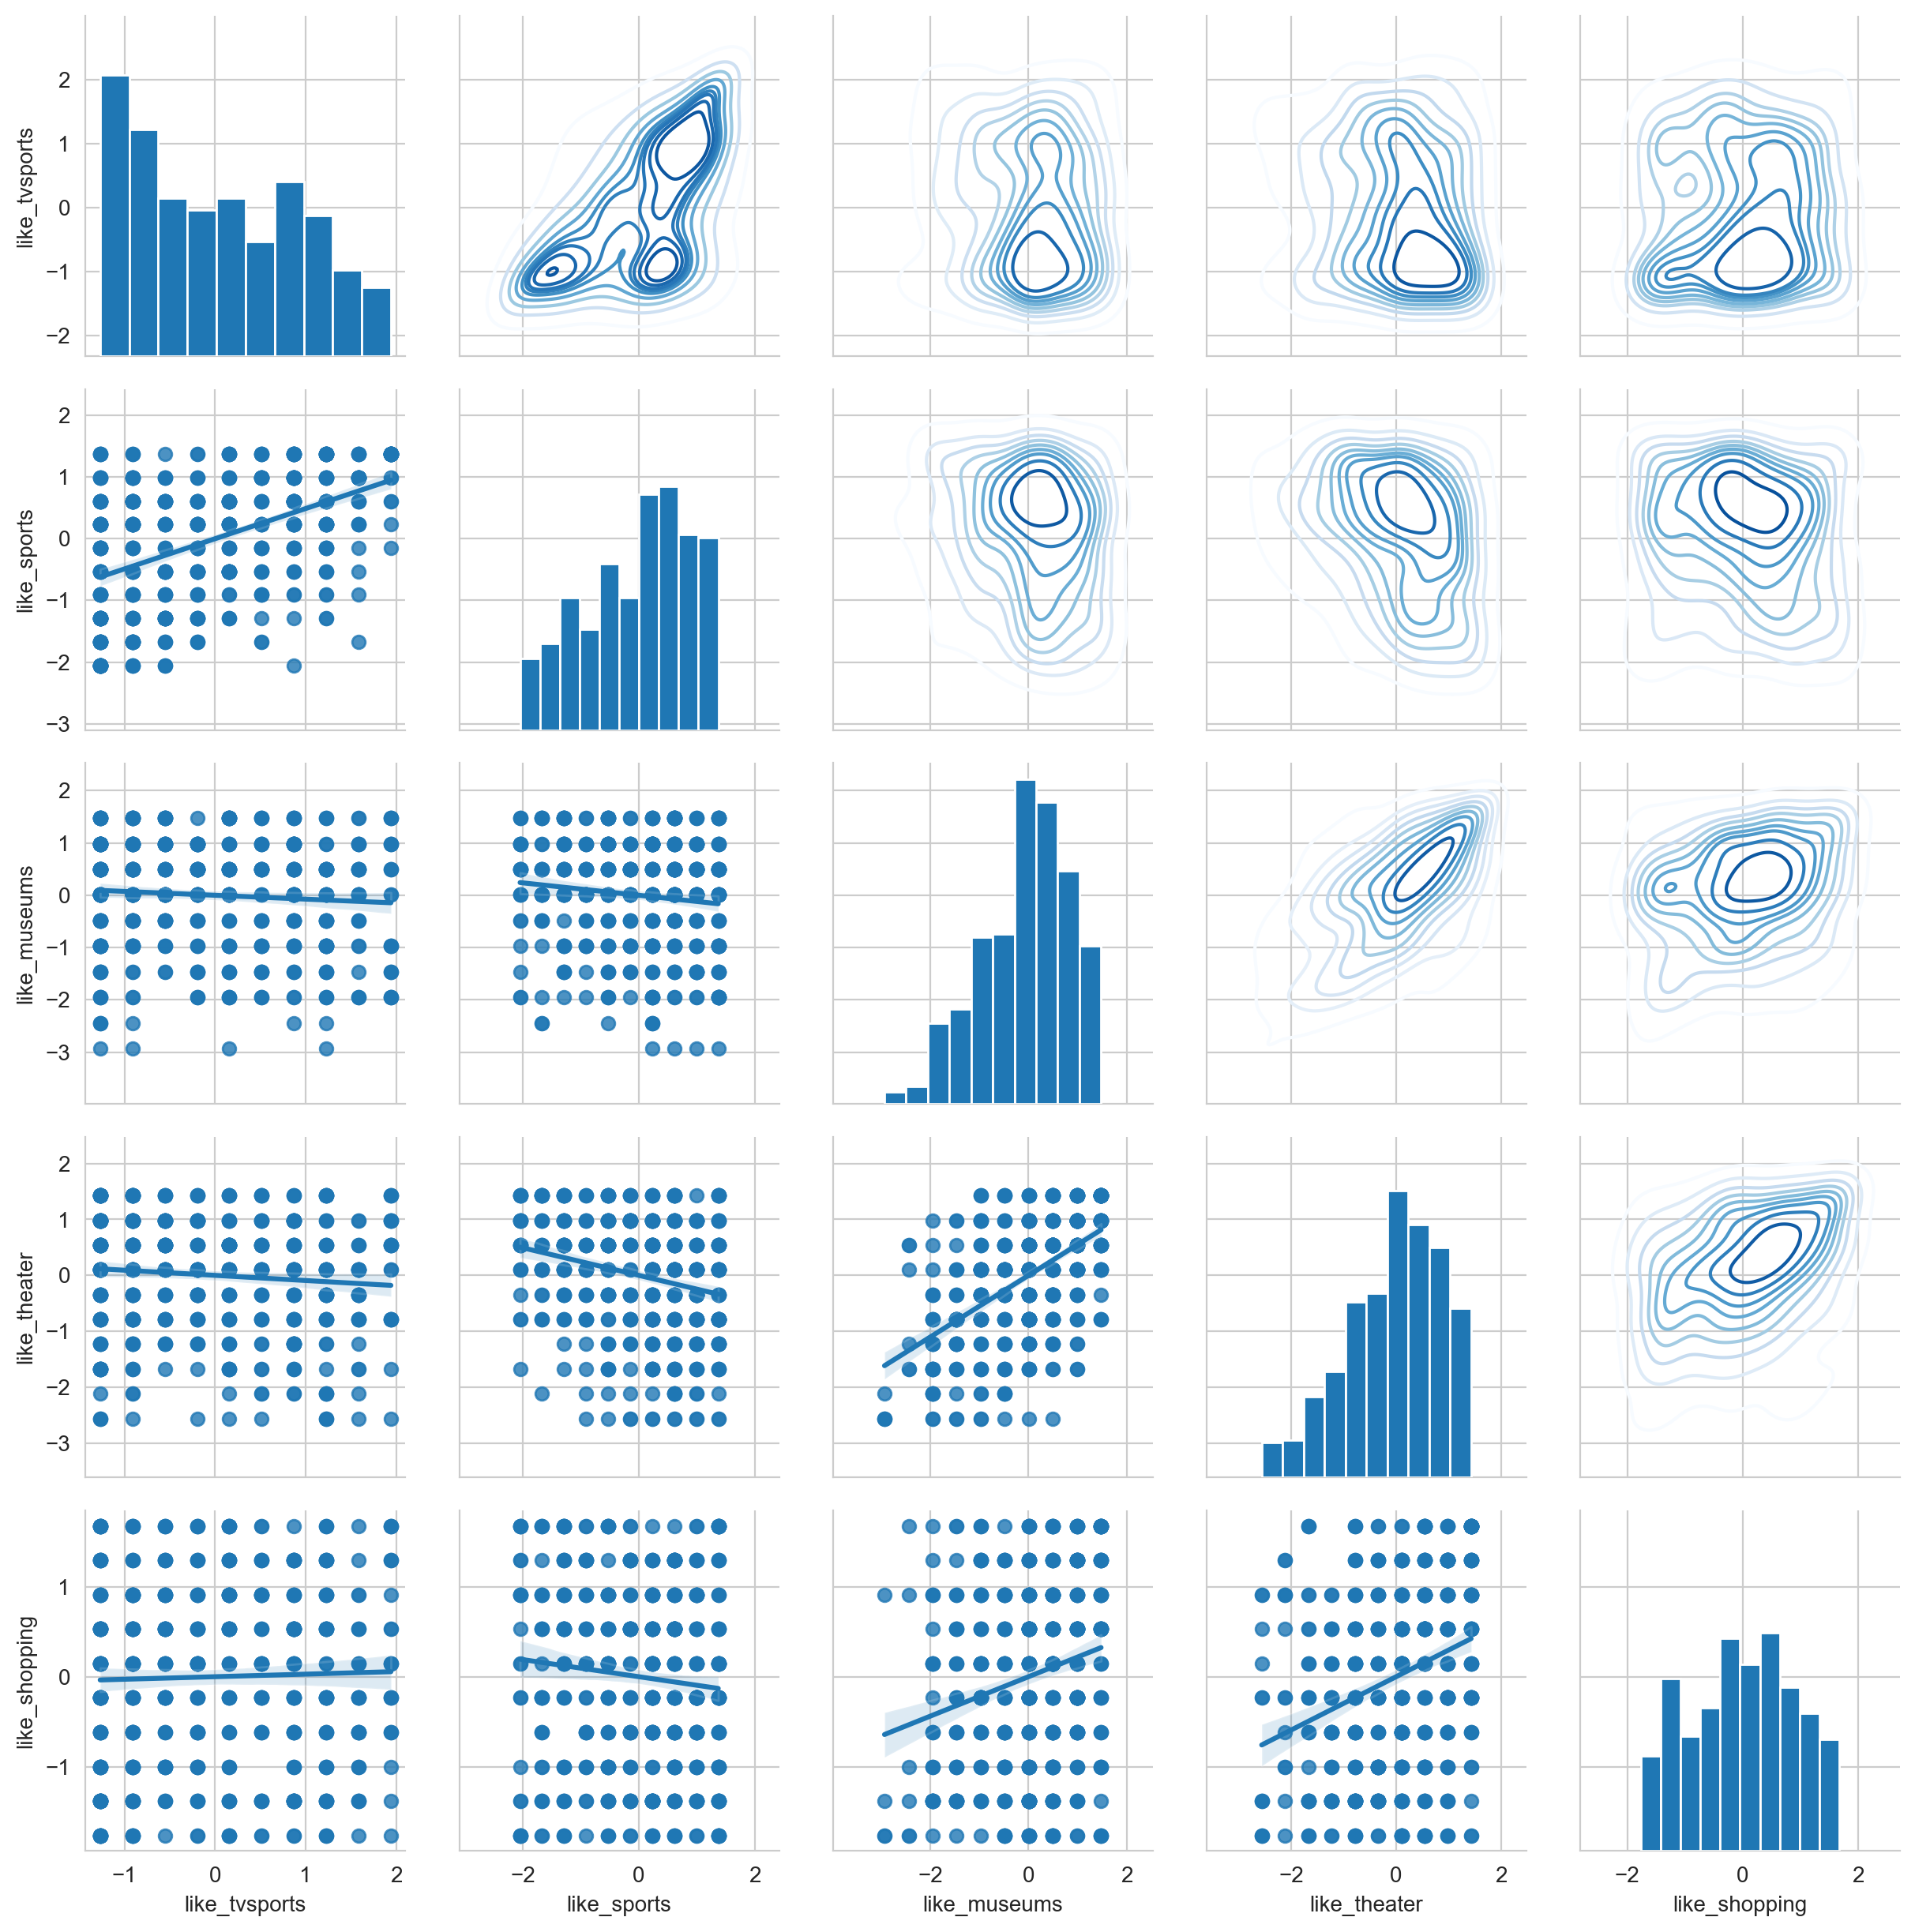

In [19]:
# Plotting pairgrid
g = sns.PairGrid(preferences)
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap="Blues")
g = g.map_diag(plt.hist)
plt.show()

#### 4.C) Visualize correlation using a heat map.

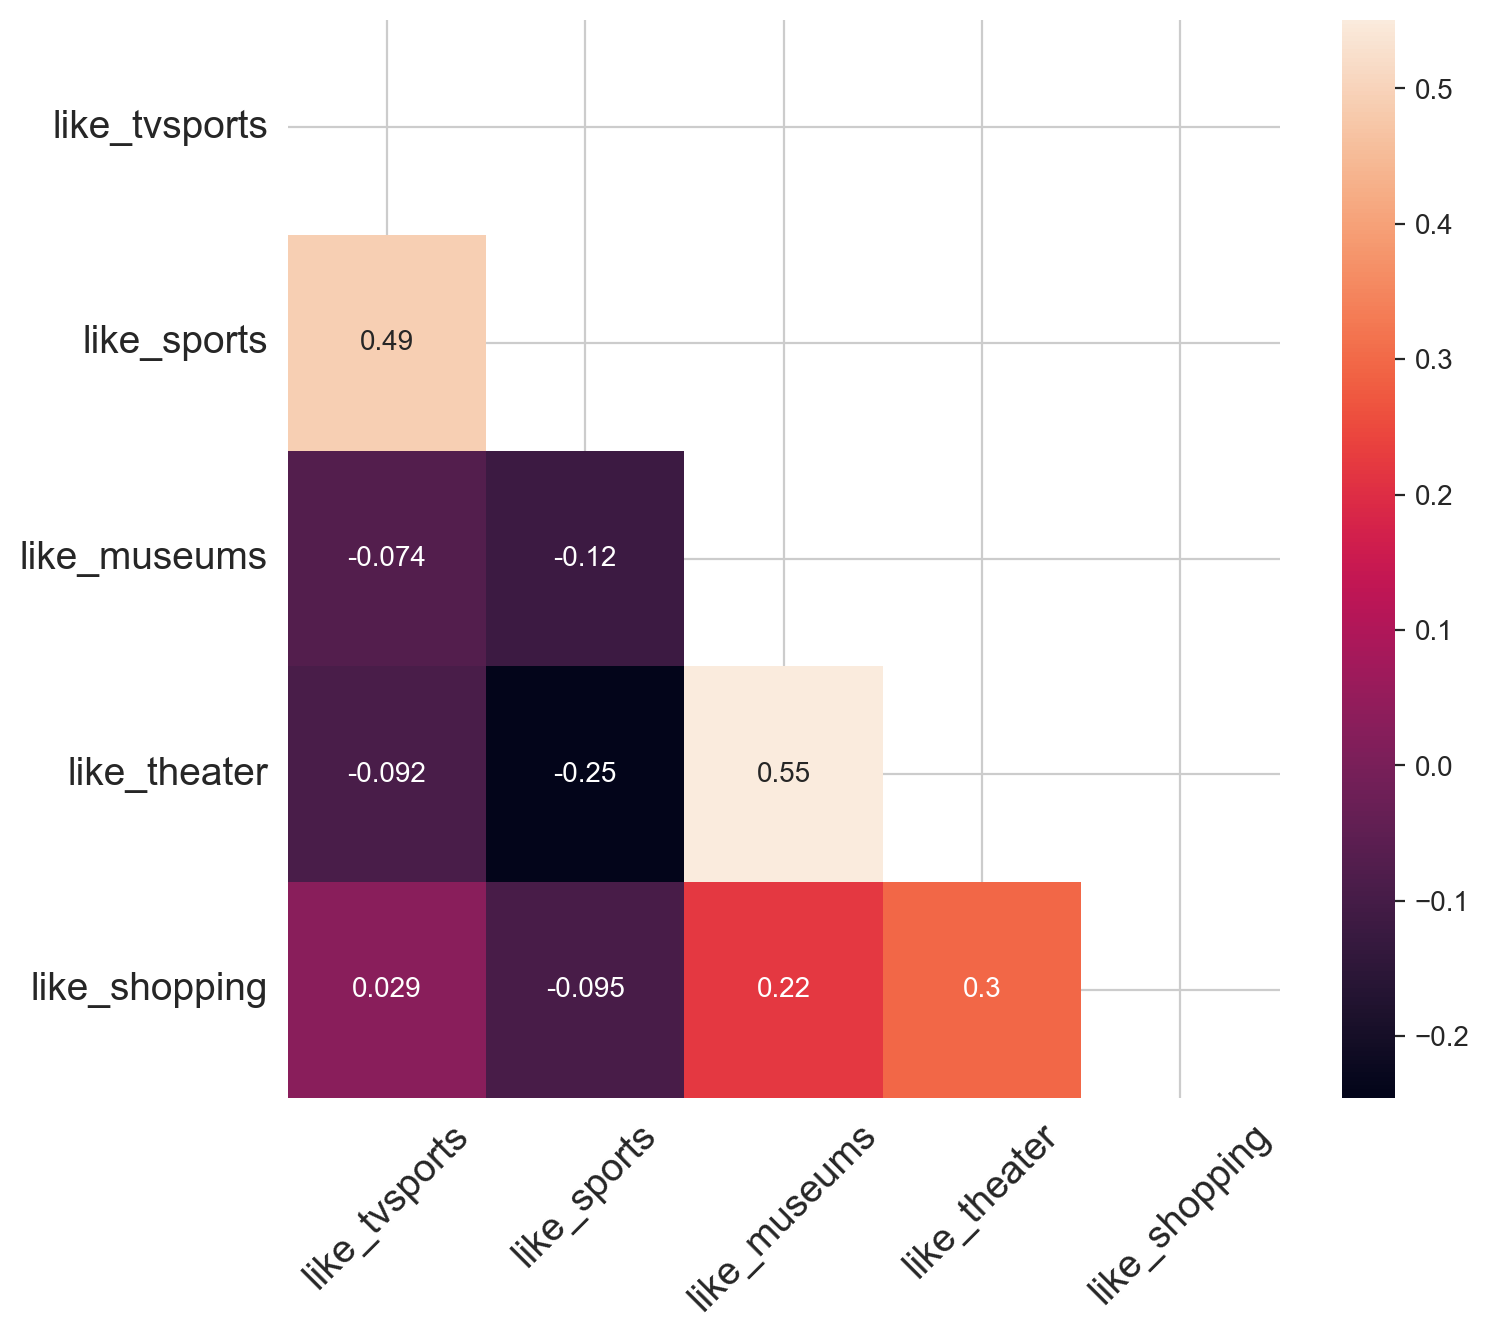

In [20]:
# Correlation values for preferences
pref_corr = preferences.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(pref_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8,7))

# Plot the heat map with Seaborn
ax = sns.heatmap(pref_corr, mask=mask, annot=True)

# Resize the labels
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.show()

---

### 5) Example: Fit PCA on the subjective ratings.

In [21]:
# Fit PCA with 5 components on subjective
subjective_pca = PCA(n_components=5)
subjective_pca.fit(subjective)

PCA(n_components=5)

---

#### 5.A) Look at the explained variance values (aka eigenvalues) and the explained variance ratios.

The eigenvalues are ordered such that the first components have the largest eigenvalues. 

The `eigenvalues` and their normalized equivalent in the `explained_variance_ratio_` tell you how much of the variance in the original data is encapsulated in the new principal components.

In [22]:
# Get the eigenvalues and explained variance ratios from the Subjective PCA
subj_exp_var_eigenvals = subjective_pca.explained_variance_
subj_exp_var_pct = subjective_pca.explained_variance_ratio_

# Print the eigenvalues and explained variance percentages
print('eigenvalues:', subj_exp_var_eigenvals, '\n')
print('explained variance pct:', subj_exp_var_pct)


eigenvalues: [2.15642881 0.88760955 0.73684686 0.72096547 0.4981493 ] 

explained variance pct: [0.43128576 0.17752191 0.14736937 0.14419309 0.09962986]


In [23]:
# Get the principal components (weighting vectors) from the Subjective PCA
subj_components = subjective_pca.components_

# Print the names of the subjective columns
print(subjective_cols, '\n')

# Iterate through the principal components and their corresponding weights
for i, pc in enumerate(['PC1', 'PC2', 'PC3', 'PC4', 'PC5']):
    # Print the weight vector for the current principal component
    print(pc, 'weighting vector:', subj_components[i])


['subjective_attractiveness', 'subjective_sincerity', 'subjective_intelligence', 'subjective_fun', 'subjective_ambition'] 

PC1 weighting vector: [-0.50189394 -0.31528977 -0.46707122 -0.48386412 -0.44318711]
PC2 weighting vector: [ 0.21825979 -0.90905995 -0.09768977  0.27400972  0.20334221]
PC3 weighting vector: [-0.40202351 -0.14438615  0.42289342 -0.48141404  0.63791176]
PC4 weighting vector: [ 0.34811874 -0.21377638  0.64842003 -0.36104737 -0.53132783]
PC5 weighting vector: [-0.64626278 -0.08749096  0.41594928  0.57330577 -0.27017855]


In [24]:
# Get the singular values from the Subjective PCA
subj_sing_values = subjective_pca.singular_values_

# Print the names of the subjective columns
print(subjective_cols, '\n')

# Iterate through the principal components and their corresponding singular values
for i, pc in enumerate(['PC1', 'PC2', 'PC3', 'PC4', 'PC5']):
    # Print the singular value for the current principal component
    print(pc, 'singular value:', subj_sing_values[i])


['subjective_attractiveness', 'subjective_sincerity', 'subjective_intelligence', 'subjective_fun', 'subjective_ambition'] 

PC1 singular value: 34.155936324526664
PC2 singular value: 21.913392449668642
PC3 singular value: 19.96582463491914
PC4 singular value: 19.749489124897238
PC5 singular value: 16.416417730275572


---

#### 5.B) Transform the subjective data into the principal component space.

The `transform()` function in the PCA will create your new component variable matrix.

In [25]:
# Transform the subjective data to principal components using the Subjective PCA
subj_to_pcs = subjective_pca.transform(subjective)
subj_to_pcs = pd.DataFrame(subj_to_pcs, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
subj_to_pcs

PC1       PC2       PC3       PC4       PC5
0    0.673320  0.034368 -0.103730 -0.357653  0.576404
1    1.349199  2.021550 -2.136817  1.070136  1.643320
2   -0.948803 -0.271214 -0.039204  0.289410 -0.184918
3    0.180113  0.571928 -0.734996 -1.233023 -0.050997
4    1.309749  2.833740  2.162998  1.758585  0.757437
..        ...       ...       ...       ...       ...
537 -3.444376 -0.108831 -0.239742  0.172409 -0.356551
538 -1.059141 -0.958184  0.504866 -0.409863  0.066780
539  1.276850  0.747756 -0.367678 -0.317563 -0.578725
540  2.371839 -0.921614  0.448279  1.654215 -1.438354
541  1.228469  0.727704 -0.345798  0.166176 -1.414105

[542 rows x 5 columns]

This transformed our five-dimensional data set into vectors along its five principal components (with zero loss).
- Using these, we can now reduce the dimensionality of our data while minimizing loss.
- For example, taking only the first three eigenvectors accounts for $0.431 + 0.178 + 0.147 = 75.6 \%$ of the variance.

---

#### 5.C) Visually and with numerical summaries, confirm that PCA-transformed features are not correlated.

- Keep in mind that each column in the transformed data is no longer correlated.
- Compare this to the exploration above, where many columns were correlated.

C:\Users\Wes\mambaforge\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


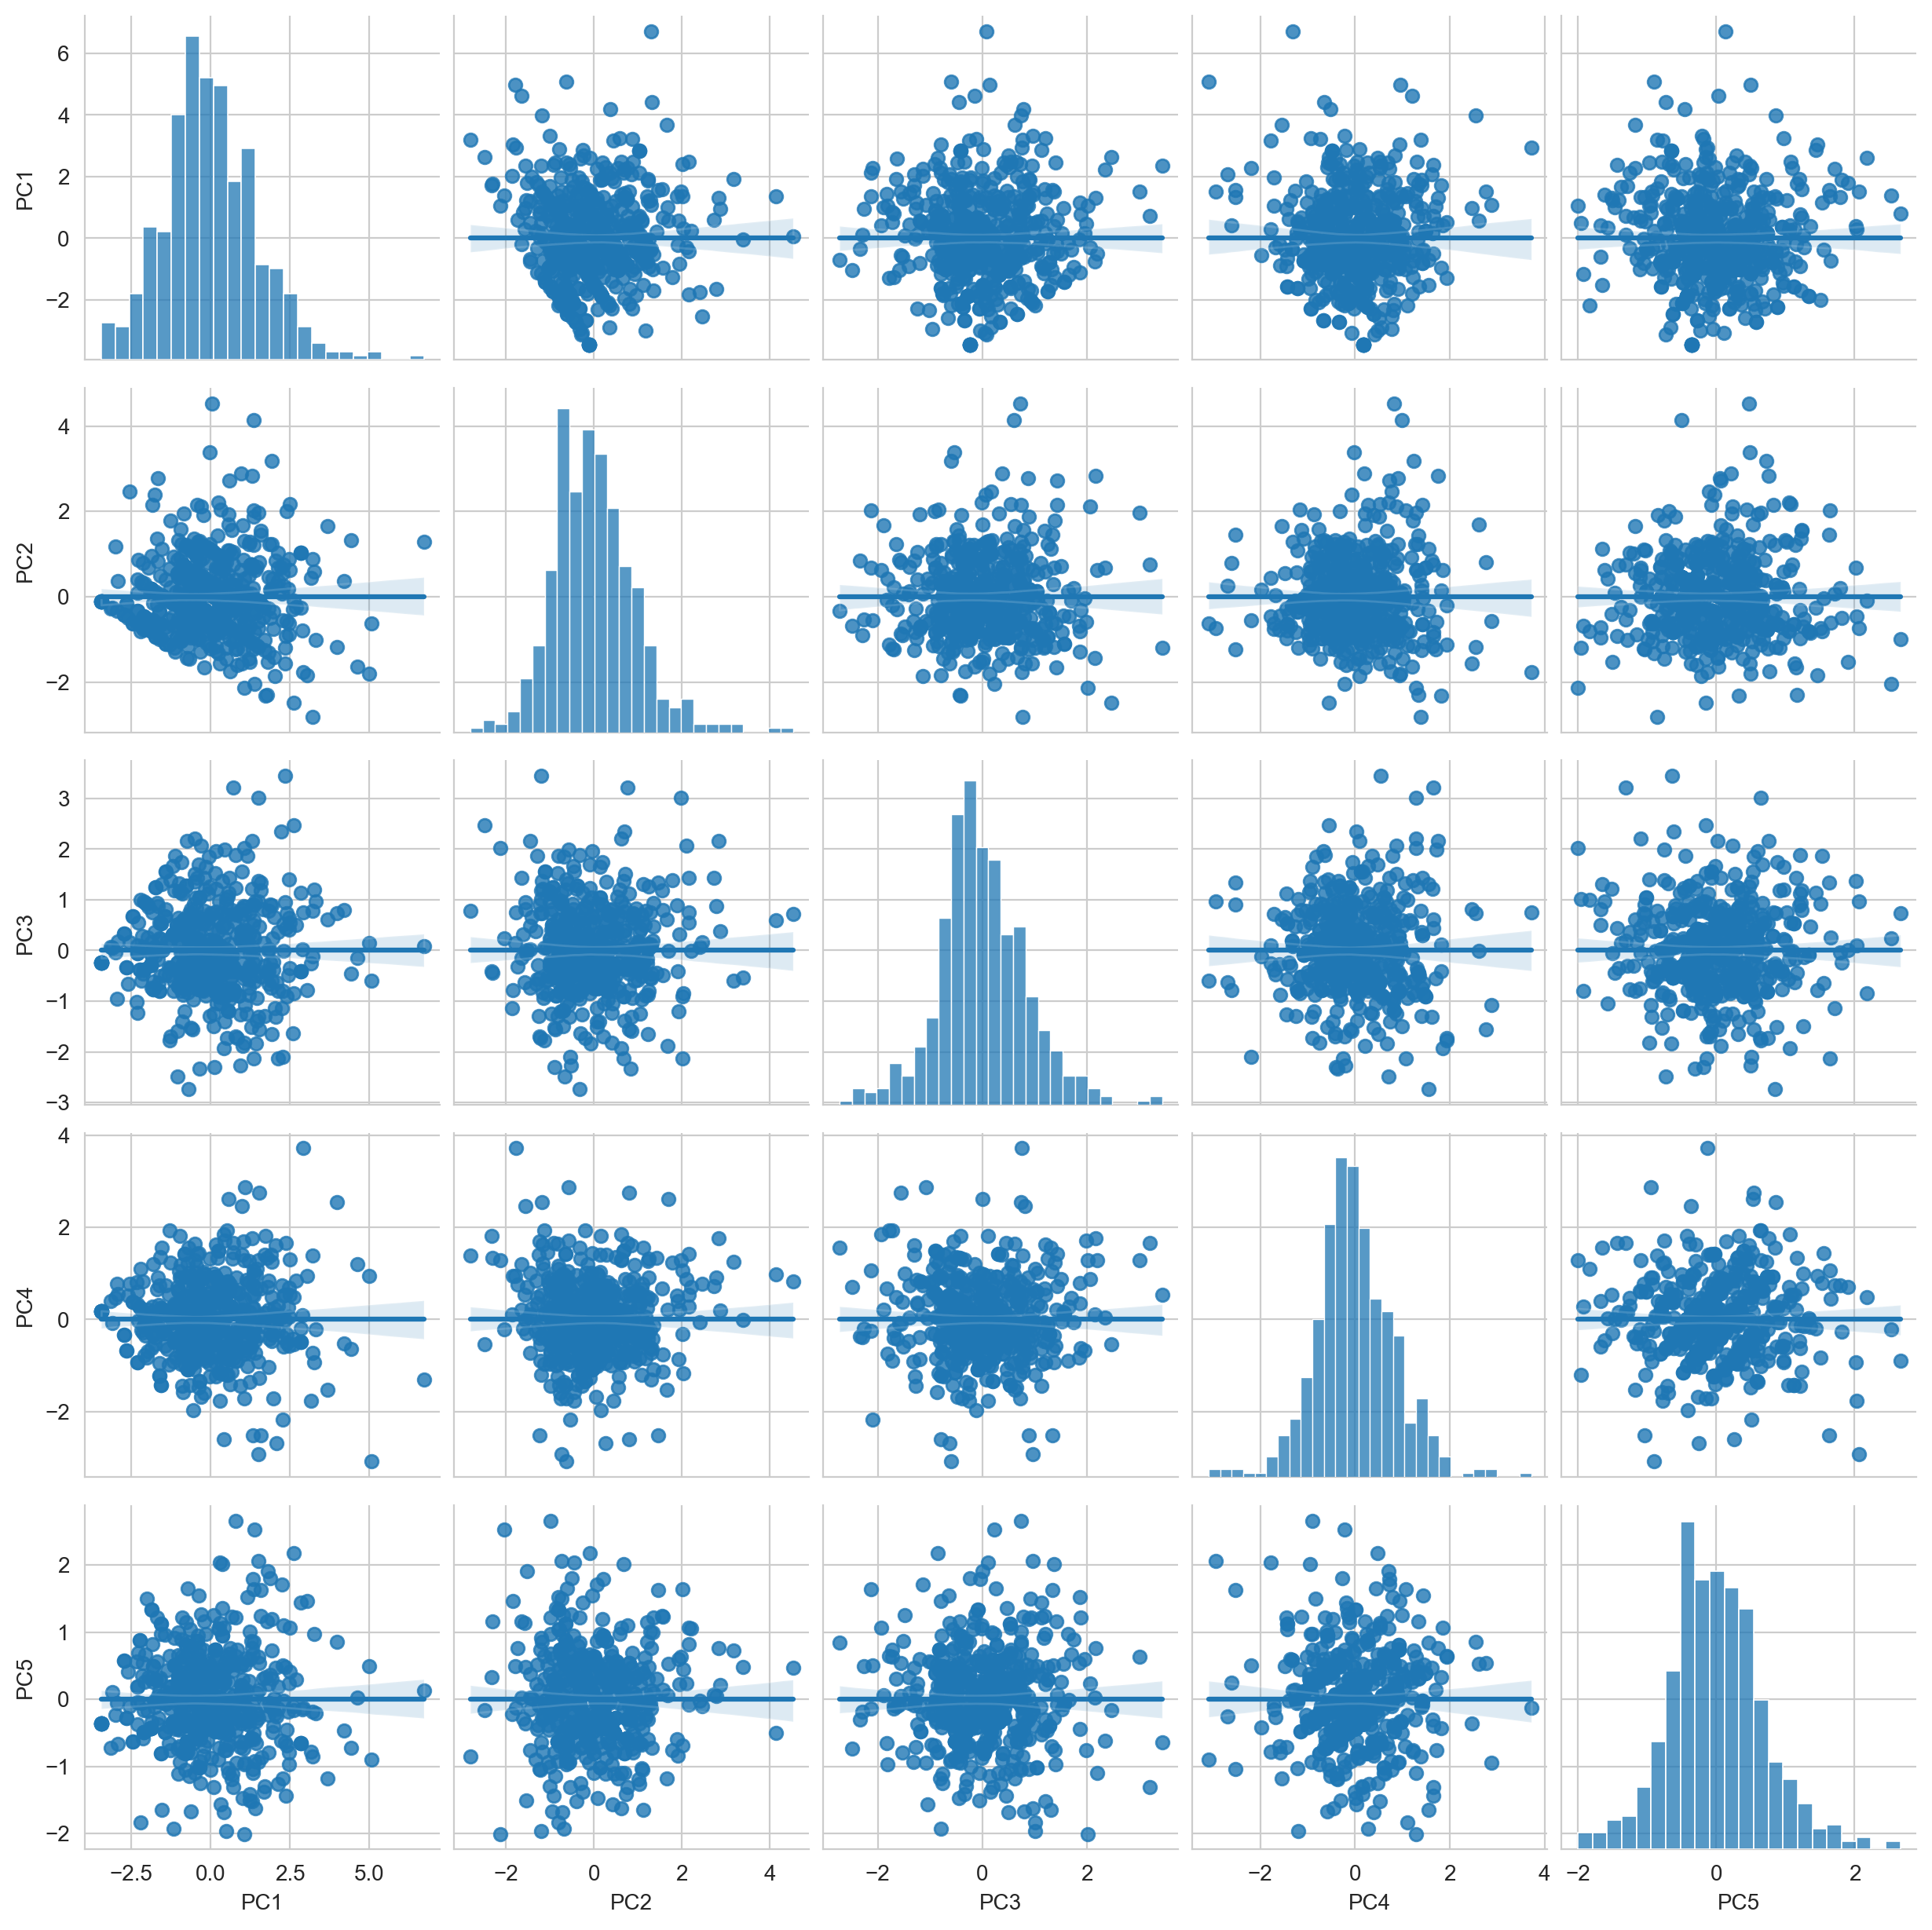

In [26]:
# Creating pairplot
sns.pairplot(subj_to_pcs, kind='reg');

In [27]:
# Correlation values for subj_to_pcs
subj_to_pcs.corr()

PC1           PC2           PC3           PC4           PC5
PC1  1.000000e+00 -1.143639e-16 -3.848613e-16 -1.089136e-16 -5.821206e-17
PC2 -1.143639e-16  1.000000e+00  2.588674e-15 -4.103901e-16 -1.141889e-16
PC3 -3.848613e-16  2.588674e-15  1.000000e+00 -4.103525e-16 -1.869751e-16
PC4 -1.089136e-16 -4.103901e-16 -4.103525e-16  1.000000e+00  3.304481e-17
PC5 -5.821206e-17 -1.141889e-16 -1.869751e-16  3.304481e-17  1.000000e+00

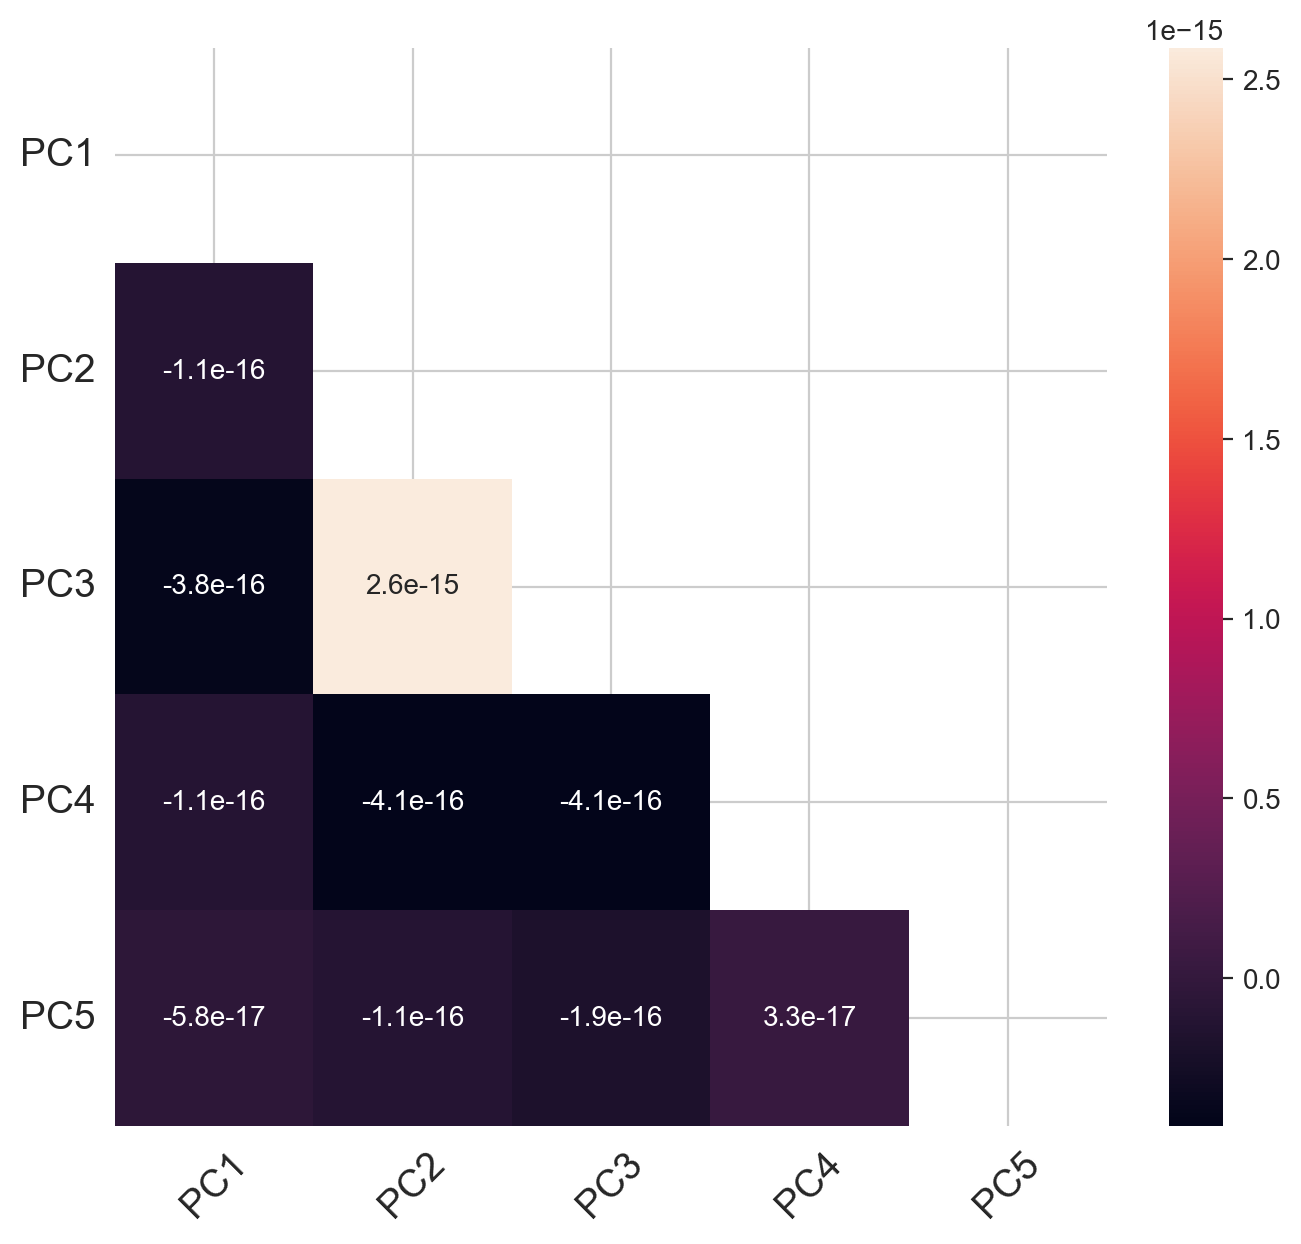

In [28]:
# Generate a mask for the upper triangle
mask = np.zeros_like(subj_to_pcs.corr())
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8,7))

# Plot the heat map with Seaborn
ax = sns.heatmap(subj_to_pcs.corr(), mask=mask, annot=True)

# Resize the labels
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.show()

Note that the diagonals are exactly 1 (as we expect) and the off diagonals are very, very, very small - basically zero!

---

### 6) Optional: How were the data transformed?

To demonstrate how the new principal component matrix is created from the original variable columns and the eigenvector weighting matrix, we'll create the first component (PC1) manually.

#### 6.A) Pull out the eigenvector for PC1.

In [29]:
# Get the principal components (weighting vectors) from the Subjective PCA
subj_components = subjective_pca.components_
# Extract the principal component values for the first principal component (PC1)
person1_pcas = subj_components[0, :]

#### 6.B) Create a DataFrame showing the original values for the subjective variables for `person1`.

In [30]:
# Extract the data for the first person (row) from the subjective data and transpose it
person1 = subjective.iloc[0:1,:].T
person1.columns=['original']
person1

original
subjective_attractiveness -0.785746
subjective_sincerity      -0.202528
subjective_intelligence   -0.353867
subjective_fun             0.193145
subjective_ambition       -0.323290

#### 6.C) Add the eigenvector for PC1: the weights by which to multiply each original variable.

Recall that each component is a linear combination of the original variables, multiplied by a "weight" defined in the eigenvector of that component.

In [31]:
person1['eigenvector'] = person1_pcas
person1

original  eigenvector
subjective_attractiveness -0.785746    -0.501894
subjective_sincerity      -0.202528    -0.315290
subjective_intelligence   -0.353867    -0.467071
subjective_fun             0.193145    -0.483864
subjective_ambition       -0.323290    -0.443187

#### 6.D) Multiply the original variable values by the eigenvector values.

These are the "pieces" of PC1 that will be added together to create the new value for that person.

In [32]:
person1['weighted'] = person1['original'] * person1['eigenvector']
person1

original  eigenvector  weighted
subjective_attractiveness -0.785746    -0.501894  0.394361
subjective_sincerity      -0.202528    -0.315290  0.063855
subjective_intelligence   -0.353867    -0.467071  0.165281
subjective_fun             0.193145    -0.483864 -0.093456
subjective_ambition       -0.323290    -0.443187  0.143278

#### 6.E) Sum the original values multiplied by the eigenvector weights to get `person1`’s value for PC1.

In [33]:
# Verify that the person1's PC1 is the same for both the manual method we did and the 'transform' method
print(person1['weighted'].sum())
print(subj_to_pcs.iloc[0, 0])

0.6733199961023891
0.6733199961023891


---

### 7) Fit PCA on the preference data.

Now that you've seen how it's done, try it yourself!

- Find PCA eigenvalues and eigenvectors for the five `sd_like` columns.
- Transform the original `sd_like` columns into the principal component space.
- Verify that these columns are uncorrelated.

### Note: I decided to rename 'sd_like' as 'preferences'

In [34]:
# Fit PCA with 5 components on preferences
pref_pca = PCA(n_components=5)
pref_pca.fit(preferences)

PCA(n_components=5)

#### 7.A) Find PCA eigenvalues and eigenvectors for the five `sd_like` columns.

In [35]:
# Print the explained variance ratios for each principal component
print(pref_pca.explained_variance_ratio_)
print('-------------------------------------\n')

# Get the principal components (weighting vectors) from the Preference PCA
pref_comp = pref_pca.components_

# Print the names of the preference columns
print(preferences.columns.values)
print('-------------------------------------\n')

# Iterate through the principal components and their corresponding weights
for i, pc in enumerate(['PC1', 'PC2', 'PC3', 'PC4', 'PC5']):
    # Print the weight vector for the current principal component
    print(pc, 'weighting vector:', pref_comp[i])
    print('-------------------------------------\n')


[0.38165737 0.26823578 0.16433237 0.10400236 0.08177213]
-------------------------------------

['like_tvsports' 'like_sports' 'like_museums' 'like_theater'
 'like_shopping']
-------------------------------------

PC1 weighting vector: [ 0.32075311  0.43067013 -0.51328922 -0.57313168 -0.34596956]
-------------------------------------

PC2 weighting vector: [0.64992163 0.53219199 0.3241323  0.26506368 0.34504067]
-------------------------------------

PC3 weighting vector: [ 2.08050622e-05 -1.60309917e-01 -4.54907251e-01 -2.24216382e-01
  8.46809977e-01]
-------------------------------------

PC4 weighting vector: [ 0.62245171 -0.58748868 -0.33822794  0.33335442 -0.20466461]
-------------------------------------

PC5 weighting vector: [ 0.29542035 -0.40056549  0.55689648 -0.66322181  0.0477206 ]
-------------------------------------



#### 7.B) Transform the original `sd_like` columns into the principal component space.

In [36]:
# Transform the preferences data to principal components using the pref_pca
pref_pcs = pref_pca.transform(preferences.values)
pref_pcs = pd.DataFrame(pref_pcs, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pref_pcs

C:\Users\Wes\mambaforge\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


PC1       PC2       PC3       PC4       PC5
0    2.790389 -1.378769  2.521255 -1.198032 -0.559229
1   -1.321916 -1.202391 -1.086802  0.555303 -0.176345
2   -0.034609  0.137881  1.399843  1.698578  0.316437
3   -0.996418 -2.420724 -1.166861  1.268060 -0.559230
4    0.165133  0.061242  1.032339 -0.397165 -0.148144
..        ...       ...       ...       ...       ...
537  2.905832  0.357228  0.421165  0.335944 -0.487567
538 -0.315737  0.889204  0.549888 -0.268915 -0.509717
539 -0.517633 -0.563290  0.184358 -0.033890 -0.006249
540 -0.207401 -0.927567  0.645851 -1.075185  0.236262
541 -1.027409  0.420428 -0.343321 -1.501812  0.268006

[542 rows x 5 columns]

#### 7.C) Verify that these columns are uncorrelated.

C:\Users\Wes\mambaforge\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


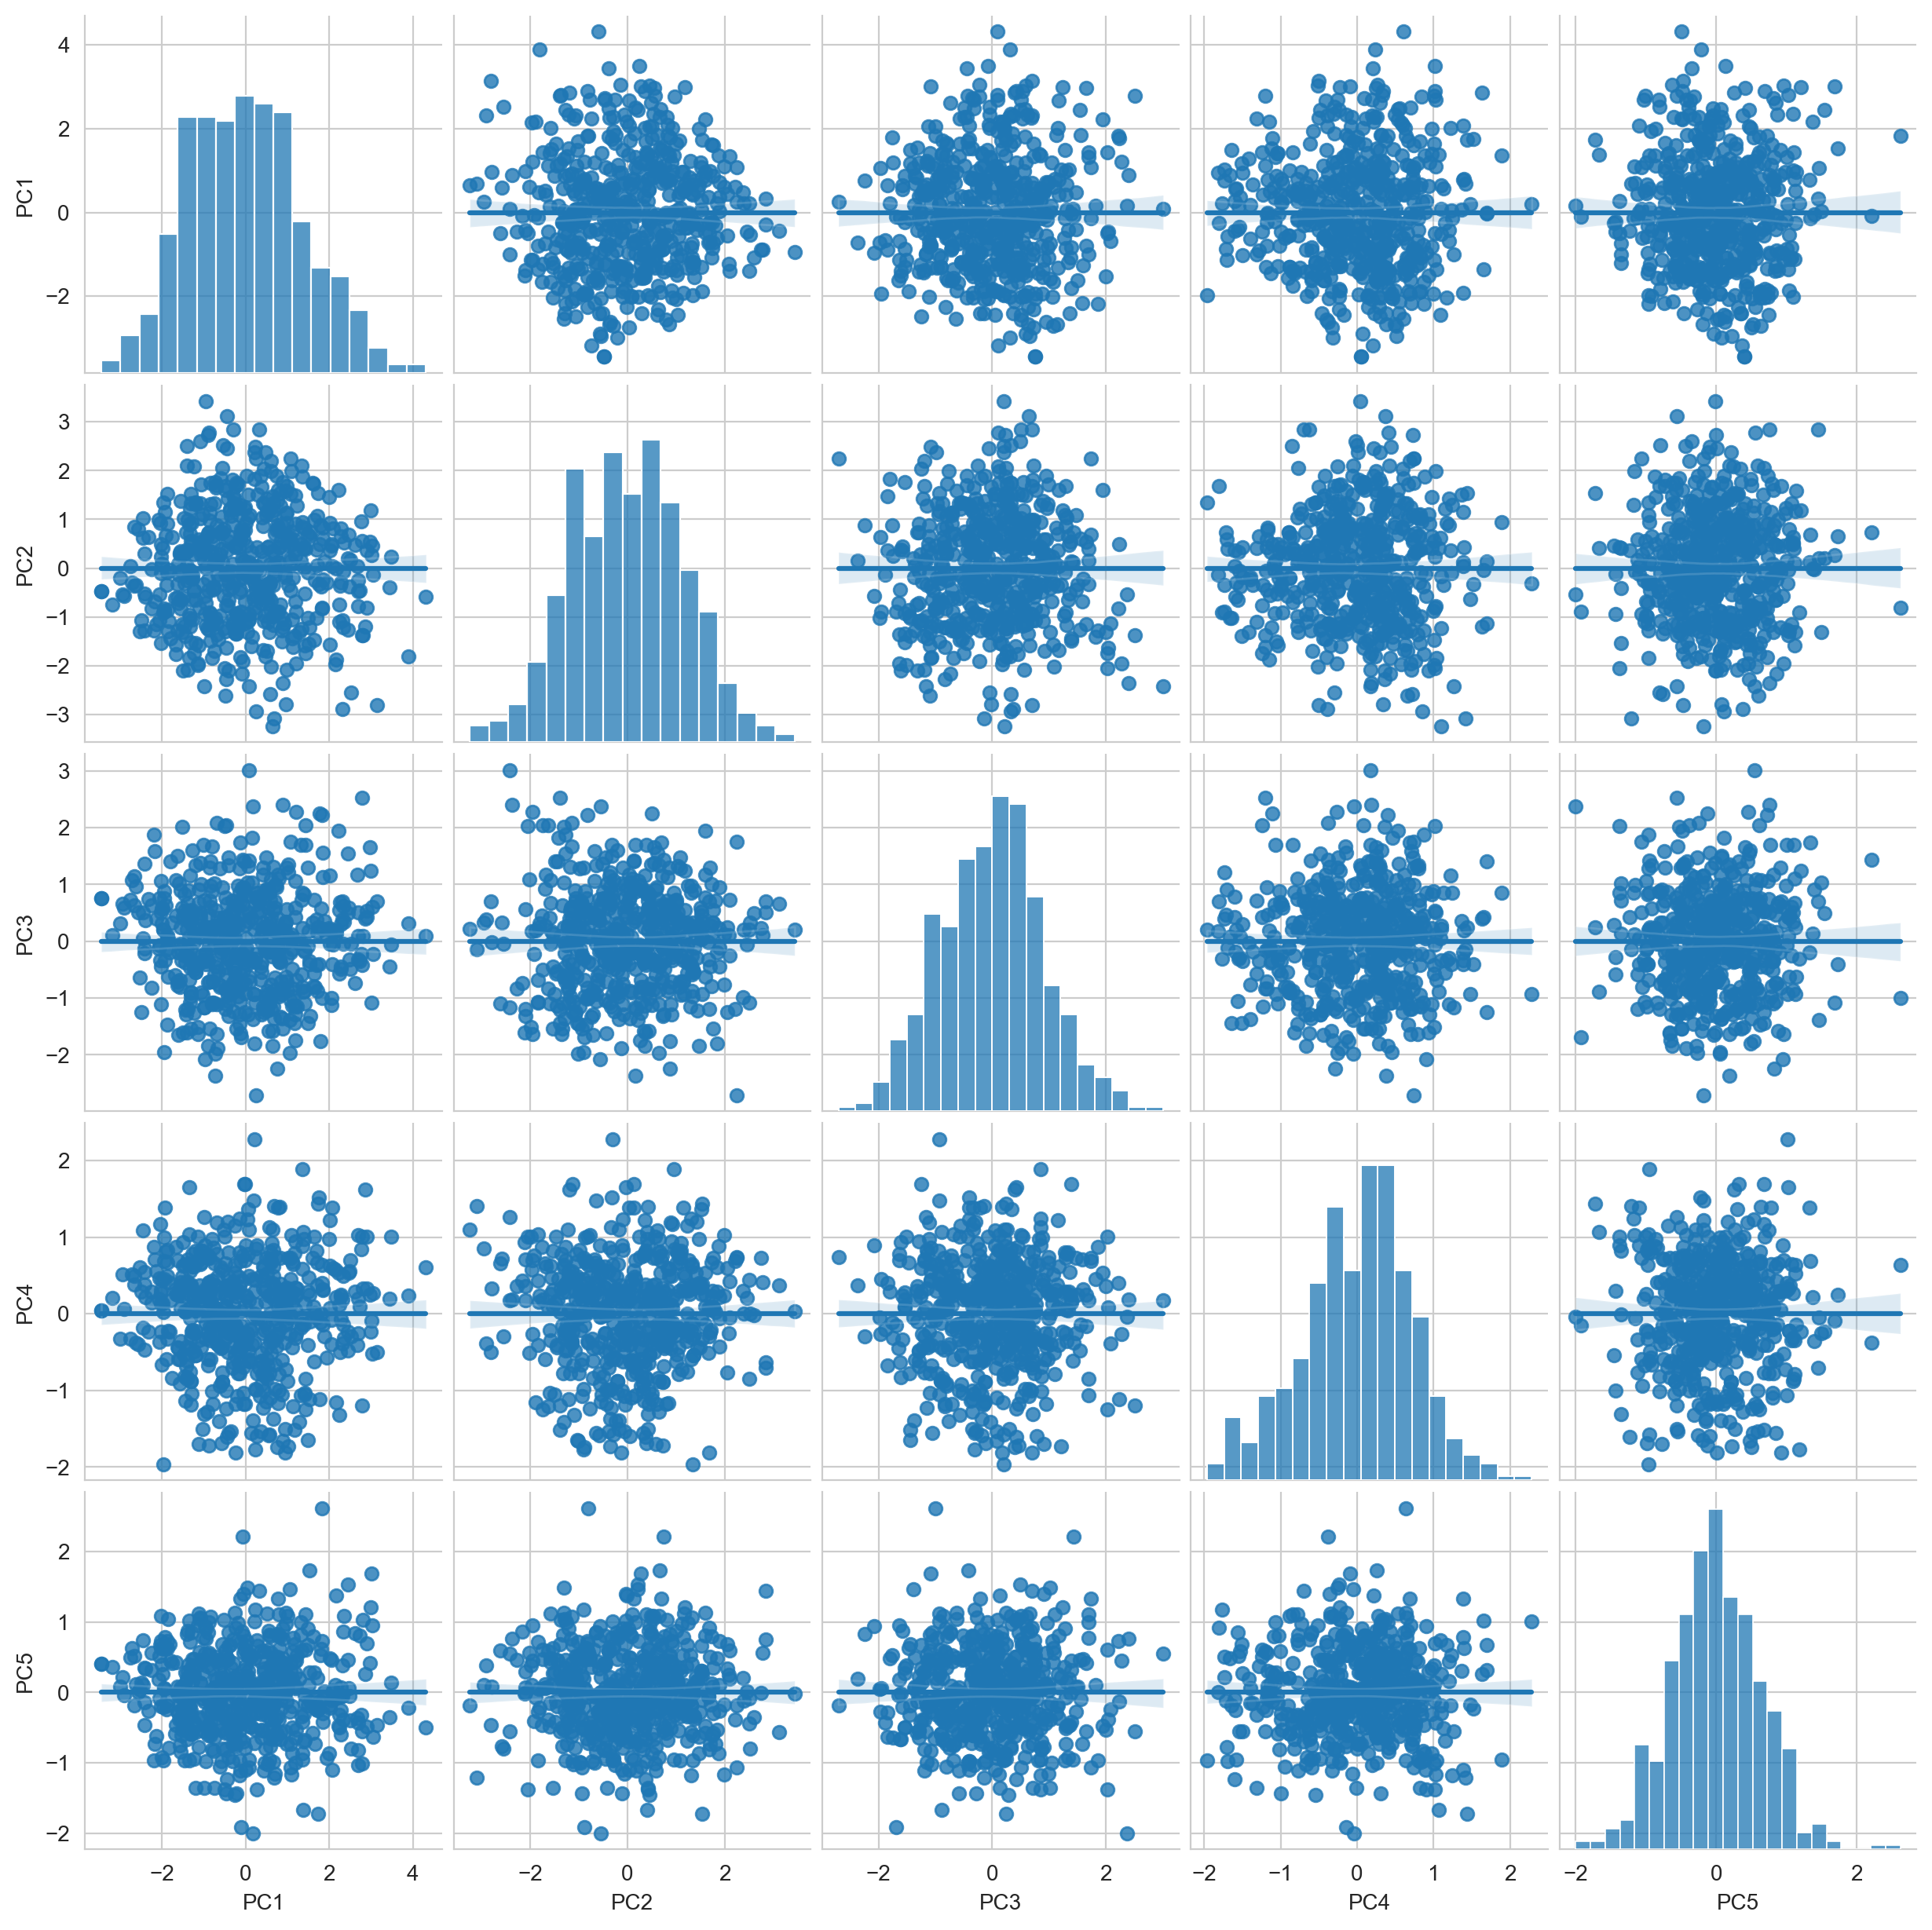

In [37]:
# Creating pairplot
sns.pairplot(pref_pcs, kind='reg');

In [38]:
# Correlation values for pref_pcs
pref_pcs.corr()

PC1           PC2           PC3           PC4           PC5
PC1  1.000000e+00  2.766928e-16 -1.901909e-16 -7.745909e-17 -5.919744e-16
PC2  2.766928e-16  1.000000e+00  4.520691e-17 -6.276014e-16 -2.542659e-16
PC3 -1.901909e-16  4.520691e-17  1.000000e+00  2.081485e-16  2.675378e-16
PC4 -7.745909e-17 -6.276014e-16  2.081485e-16  1.000000e+00  2.612503e-16
PC5 -5.919744e-16 -2.542659e-16  2.675378e-16  2.612503e-16  1.000000e+00

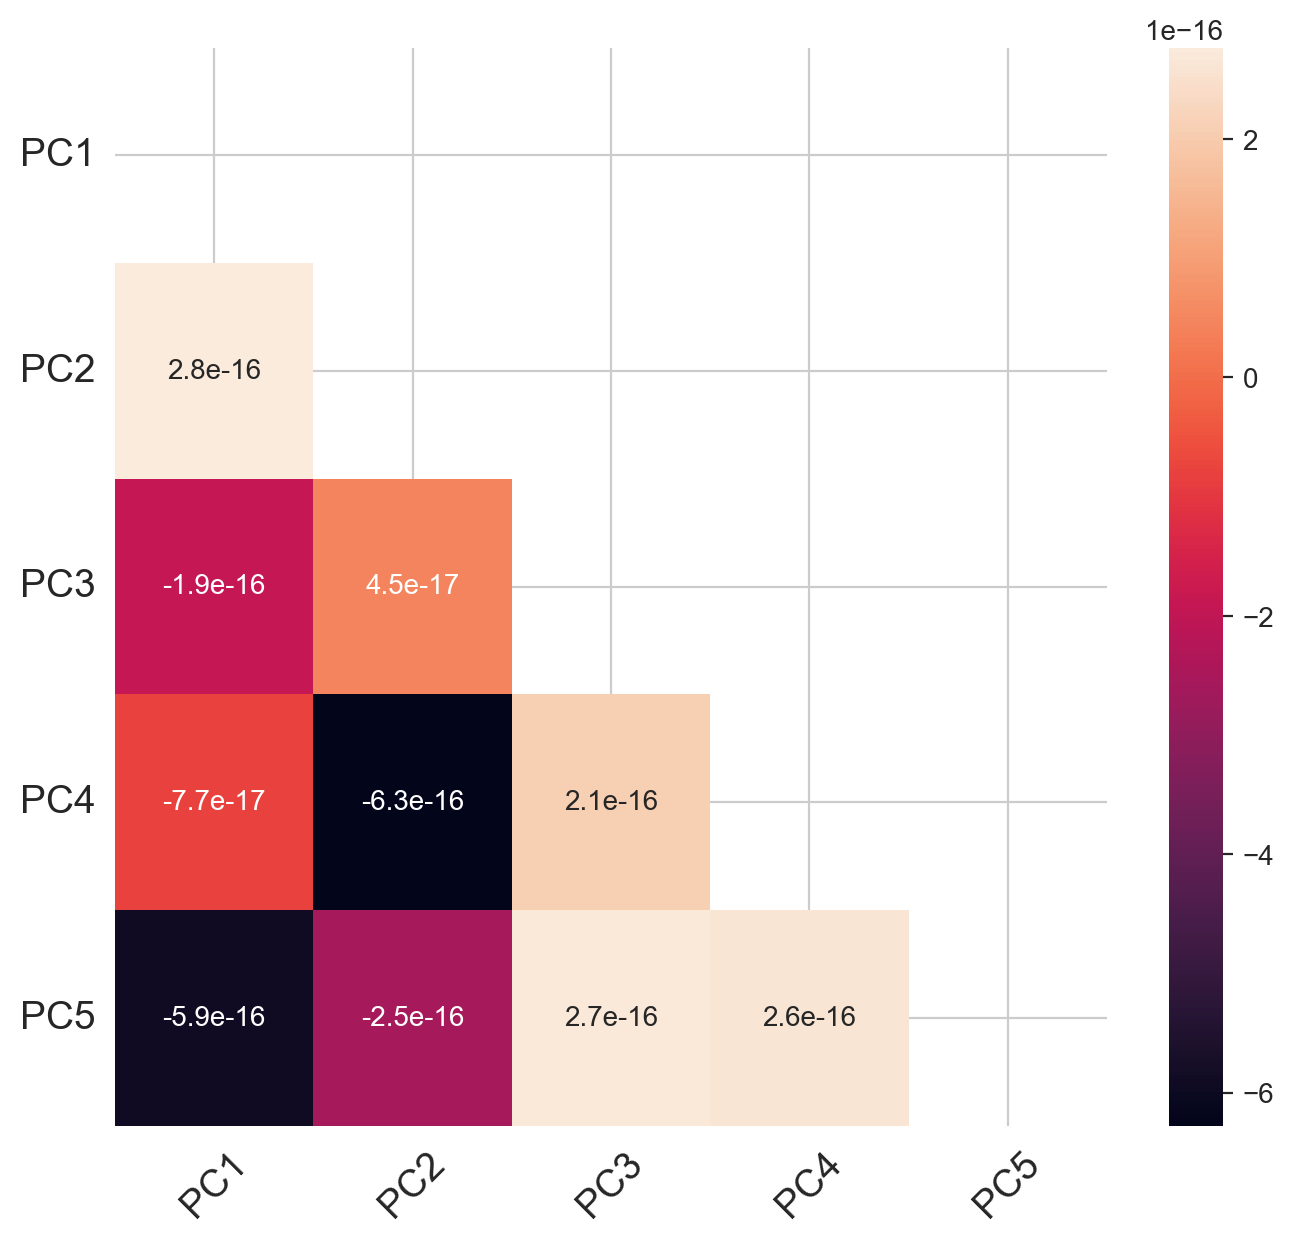

In [39]:
# Generate a mask for the upper triangle
mask = np.zeros_like(pref_pcs.corr())
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8,7))

# Plot the heat map with Seaborn
ax = sns.heatmap(pref_pcs.corr(), mask=mask, annot=True)

# Resize the labels
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.show()

Note that the diagonals are exactly 1 (as we expect) and the off diagonals are very, very, very small - basically zero!

---

### 8) Use PCA for dimensionality reduction.

Using linear regression, let's predict whether or not a user likes reading.

**The key question:** Can we get the same prediction accuracy using only the first three principal components as features versus using all five original values as features?

In [40]:
# Create target matrix
reading = sd['like_reading']

#### 8.A) Linear regression cross-validated on original variables (`sd_like.values`).

- What is the mean cross-validation score?
- Keep in mind that linear regression uses $R^2$ for score, so one is the ideal score.

### Note: I decided to rename 'sd_like' as 'preferences'

In [41]:
# Create a LinearRegression model
linreg = LinearRegression()
# Perform cross-validation on the LinearRegression model
preferences_cross_val_scores = cross_val_score(linreg, preferences, reading, cv=10)
# Print the cross-validated scores
print('Column names: ', preferences.columns.values)
print('Cross Validated Scores: ', preferences_cross_val_scores)
print('Mean Cross Val Score: ', np.mean(preferences_cross_val_scores))

Column names:  ['like_tvsports' 'like_sports' 'like_museums' 'like_theater'
 'like_shopping']
Cross Validated Scores:  [ 0.0572145  -0.10260757  0.20705881 -0.02153198  0.05578277  0.03202637
  0.14161886  0.22415082  0.116138    0.16539735]
Mean Cross Val Score:  0.08752479304756669


In [42]:
# Fit the LinearRegression model on the data
linreg.fit(preferences, reading)

# Print the coefficients for each variable in the model
for coef, var in zip(linreg.coef_, preferences.columns):
    print(var, coef)

like_tvsports -0.17913636420207626
like_sports -0.12553557523004488
like_museums 0.6425663957400526
like_theater 0.15595997550310803
like_shopping -0.1993327360064974


#### 8.B) Linear regression on the first principal component.

- What is the mean cross-validation score?

In [43]:
# Create a LinearRegression model for PCA-based linear regression
pca_linreg = LinearRegression()
# Perform cross-validation on the PCA-based LinearRegression model
pca_scores = cross_val_score(pca_linreg, pref_pcs.iloc[:, 0:1], reading, cv=10)
# Print the cross-validated scores
print('Cross Validated Scores: ', pca_scores)
# Print the mean cross-validated score
print('Mean Cross Val Score: ', np.mean(pca_scores))

Cross Validated Scores:  [-0.02858    -0.01250406  0.24228217 -0.06029094 -0.04921511  0.03747336
  0.05234334  0.15589976  0.08338934  0.08788686]
Mean Cross Val Score:  0.050868472838592825


#### 8.C) Linear regression on first three principal components.

- What is the mean cross-validation score?

In [44]:
# Create a LinearRegression model for PCA-based linear regression
pca_linreg = LinearRegression()
# Perform cross-validation on the PCA-based LinearRegression model
pca_scores = cross_val_score(pca_linreg, pref_pcs.iloc[:, 0:3], reading, cv=10)
# Print the cross-validated scores
print('Cross Validated Scores: ', pca_scores)
# Print the mean cross-validated score
print('Mean Cross Val Score: ', np.mean(pca_scores))

Cross Validated Scores:  [ 0.01553468 -0.09745245  0.24144348 -0.04271056  0.07264787  0.05968088
  0.15983856  0.22683943  0.08212394  0.15709538]
Mean Cross Val Score:  0.08750412203428812


---

**Check yourself**. The mean cross-validation score should be nearly the same for the first three principal components as it was on the original five-component data.

**Yes it is nearly the same. 0.087524 for the 5-component original. 0.087504 for the first 3 principal components.**